# **Actividad Semanal 7**

José Eduardo Arteaga Valdés 

A01273800

Materia: Ciencia y Analítica de Datos

Profesora Titular: María de la Paz Rico Fernández

Profesor Tutor: Mario Alberto Solano Saldaña

---

#Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.



---



**Paso 1.**

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [3]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
220,3.408241,47.421140
519,4.510989,39.014060
612,4.859392,36.102705
449,4.277074,28.927687
559,4.624360,37.374532
967,7.058891,25.040415
683,5.089636,31.095210
595,4.781505,39.032405
280,3.714137,37.324954
479,4.351203,40.618167


In [4]:
columns = df.columns.drop('Manufacturing Cost')
features = columns
label = ['Manufacturing Cost']

X = df[features]
y = df[label]

##para esta tabla en especial, que solo tiene dos columnas, podemos hacer este bloque como 
    ##X = df[['Number of Units']]
    ##y = df['Manufacturing Cost']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

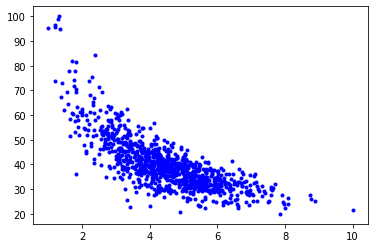

In [11]:
plt.plot(X,y,'b.')

---
**Paso 2. Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [8]:
#Regresión Lineal
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
 #Modelo generado
 linear_reg.coef_, linear_reg.intercept_

(array([[-5.98882699]]), array([66.83650741]))

$ \hat{y} = -5.98X + 66.83 $

In [41]:
#Error
from sklearn import metrics
from sklearn.metrics import r2_score

X_fit = np.linspace(0, 2, 900)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit))

Error medio Absoluto (MAE): 21.807869901167646


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [43]:
#R cuadrada
print('r2_score',r2_score(y_train, y_fit))

r2_score -4.032714893509999


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


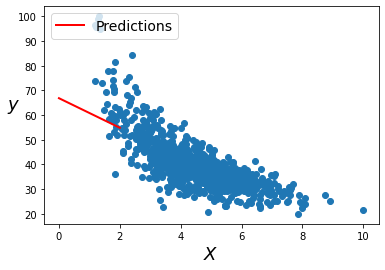

In [24]:
#Plot
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

---
**Paso 2. Regresión Polinomial.**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [9]:
#Regresión Polinomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [10]:
#Modelo generado

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[-16.82425278,   1.17336718]]), array([89.73719678]))

$\hat{y} =  -16.82X + 1.17X^2 + 89.73$

In [11]:
#Error
from sklearn import metrics
from sklearn.metrics import r2_score

X_fit2 = np.linspace(0, 2, 900)
y_fit2 = linear_reg.predict(X_fit2[:, np.newaxis])

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit2))

Error medio Absoluto (MAE): 21.807869901167646


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [44]:
#R cuadrada
print('r2_score',r2_score(y_train, y_fit2))

r2_score -4.032714893509999


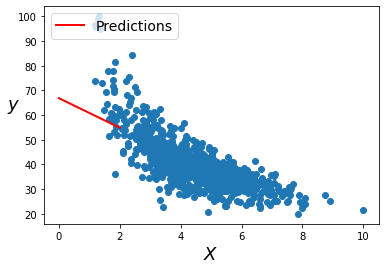

In [12]:
#Plot

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X_train, y_train)
plt.plot(X_fit2, y_fit2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);



---
**Paso 3.1. Ridge**

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [12]:
#Ridge -

from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

X_fit3 = np.linspace(0, 2, 900)
y_fit3 = reg.predict(X_fit3[:, np.newaxis])

[[-5.98505893]]
[66.81965009]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


In [14]:
#Ridge - Modelo generado

reg.coef_, reg.intercept_

(array([[-5.98505893]]), array([66.81965009]))

$ \hat{y} = -5.98X + 66.81 $

In [11]:
#Ridge - Error
from sklearn import metrics
from sklearn.metrics import r2_score


print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit3))

Error medio Absoluto (MAE): 21.795812092542516


In [20]:
#Ridge - R cuadrada
print('r2_score',r2_score(y_train, y_fit3))

r2_score -4.027638627520623


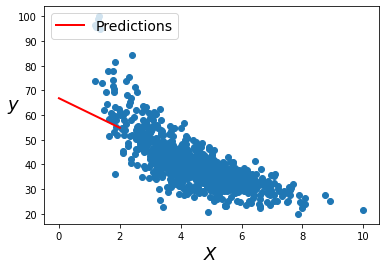

In [10]:
#Ridge - Plot

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_fit3, y_fit3, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);



---

**Paso 3.2. Lasso**

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


In [16]:
#Lasso -

from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

X_fit4 = np.linspace(0, 2, 900)
y_fit4 = reg.predict(X_fit4[:, np.newaxis])


[-5.42220651]
[64.30159617]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


In [17]:
#Lasso - Modelo generado

reg.coef_, reg.intercept_

(array([-5.42220651]), array([64.30159617]))

$ \hat{y} = -5.42X + 64.30 $

In [18]:
#Lasso - Error
from sklearn import metrics
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit4))

Error medio Absoluto (MAE): 20.01034077892188


In [21]:
#Lasso - R cuadrada
print('r2_score',r2_score(y_train, y_fit4))

r2_score -3.3052791415428615


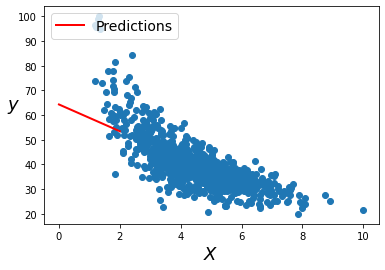

In [19]:
#Lasso - Plot

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_fit4, y_fit4, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

---

**Paso 4.**

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Mientras avanzamos con los métodos, mejores resultados se obtienen. Aunque la diferencia es sútil, se puede encontrar una mayor precisión y menor error con el método de Lasso.

Para la empresa, sería conveniente utilizar este último método que nos arrojo un MAE de 20.0103, en comparación a la Regresión lineal que arrojo un MAE de 21.8078.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [22]:
#Librerias
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [26]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


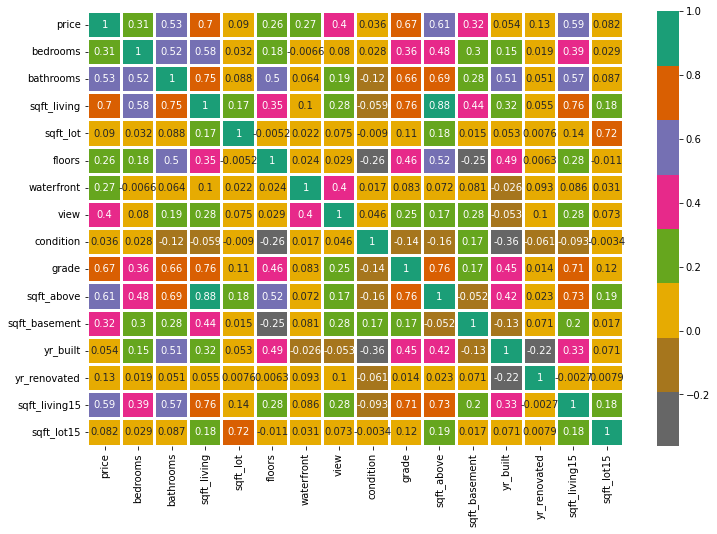

In [27]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [28]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
###Regresión Lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

#Modelo generado
print(linear_reg.coef_, linear_reg.intercept_)

#Error
X_fit2 = np.linspace(0, 2, 900)
y_fit2 = linear_reg.predict(X_fit2[:, np.newaxis])
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit2))

#R cuadrada
print('r2_score',r2_score(y_train, y_fit2))

#Plot
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
###Regresión Polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Modelo generado
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
print(lin_reg.coef_, lin_reg.intercept_)

#Error
X_fit2 = np.linspace(0, 2, 900)
y_fit2 = linear_reg.predict(X_fit2[:, np.newaxis])
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit2))

#R cuadrada
print('r2_score',r2_score(y_train, y_fit2))

#Plot
plt.scatter(X_train, y_train)
plt.plot(X_fit2, y_fit2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
##Ridge
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

X_fit3 = np.linspace(0, 2, 900)
y_fit3 = reg.predict(X_fit3[:, np.newaxis])

#Modelo generado
print(reg.coef_, reg.intercept_)

#Error
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit3))

#R cuadrada
print('r2_score',r2_score(y_train, y_fit3))

#Plot
plt.scatter(X_train, y_train)
plt.plot(X_fit3, y_fit3, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
##Lasso
reg = linear_model.Lasso()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

X_fit4 = np.linspace(0, 2, 900)
y_fit4 = reg.predict(X_fit4[:, np.newaxis])

#Modelo generado
print(reg.coef_, reg.intercept_)

#Error
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_fit4))

#R cuadrada
print('r2_score',r2_score(y_train, y_fit4))

#Plot
plt.scatter(X_train, y_train)
plt.plot(X_fit4, y_fit4, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);